In [1]:
import matplotlib.pyplot as plt
import numpy as np

import sympy
from sympy import *
from sympy.ntheory import binomial_coefficients_list

import clifford as cf
layout,blades = cf.Cl(3)
from clifford import tools
from clifford.tools import g3
from clifford.g3c import *
from clifford import transformations

import math
import scipy.optimize

In [2]:
blades

{'': 1,
 'e1': (1^e1),
 'e2': (1^e2),
 'e3': (1^e3),
 'e4': (1^e4),
 'e5': (1^e5),
 'e12': (1^e12),
 'e13': (1^e13),
 'e14': (1^e14),
 'e15': (1^e15),
 'e23': (1^e23),
 'e24': (1^e24),
 'e25': (1^e25),
 'e34': (1^e34),
 'e35': (1^e35),
 'e45': (1^e45),
 'e123': (1^e123),
 'e124': (1^e124),
 'e125': (1^e125),
 'e134': (1^e134),
 'e135': (1^e135),
 'e145': (1^e145),
 'e234': (1^e234),
 'e235': (1^e235),
 'e245': (1^e245),
 'e345': (1^e345),
 'e1234': (1^e1234),
 'e1235': (1^e1235),
 'e1245': (1^e1245),
 'e1345': (1^e1345),
 'e2345': (1^e2345),
 'e12345': (1^e12345)}

In [3]:
locals().update(blades)

In [4]:
e1

(1^e1)

In [5]:
from IPython.display import Math



In [6]:
a1 = cf.tools.g3.euc_mv_to_np(e1)
a2 = cf.tools.g3.euc_mv_to_np(e2)
a3 = cf.tools.g3.euc_mv_to_np(e3)
print (a1)
print(a2)
print(a3)

[1 0 0]
[0 1 0]
[0 0 1]


In [7]:
cf.tools.g3.euc_cross_prod(e1,e2)

(1.0^e3)

In [8]:
def cross_prod(a,b):
    return cf.tools.g3.euc_cross_prod(a,b)

In [9]:
cross_prod(e1,e2)

(1.0^e3)

In [10]:
cross_prod(e2,e3)

(1.0^e1)

In [11]:
a=(2*e1+0*e2+4*e3)

b=(0*e1+4*e2+5*e3)

c=(4*e1+5*e2+0*e3)

In [12]:
print(a)

(2^e1) + (4^e3)


In [13]:
cross_prod(a,e3)

-(1.0^e2)

In [14]:
cross_prod(a,b)


-(0.78072^e1) - (0.48795^e2) + (0.39036^e3)

In [15]:
def reciprocal_a(x):
    return (cross_prod(b,c))/(a|cross_prod(b,c)) 

def reciprocal_b(y):
    return (cross_prod(c,a))/(b|cross_prod(c,a))

def reciprocal_c(z):
    return (cross_prod(a,b))/(c|cross_prod(a,b))

In [16]:
reciprocal_a(a)

(0.2193^e1) - (0.17544^e2) + (0.14035^e3)

In [17]:
reciprocal_b(b)

-(0.17544^e1) + (0.14035^e2) + (0.08772^e3)

In [18]:
cross_prod(b,c)

-(0.6985^e1) + (0.5588^e2) - (0.44704^e3)

In [19]:
a|cross_prod(b,c)

-3.18515

In [20]:
cross_prod(b,c)/(a|cross_prod(b,c))

(0.2193^e1) - (0.17544^e2) + (0.14035^e3)

In [21]:
lattice_vectors = {}

In [22]:
type(lattice_vectors)

dict

In [23]:
direct_vectors=[a,b,c]

In [24]:
def reciprocal(x,direct_vectors):
    i = direct_vectors.index(x)
    if i %3==0:
        return (cross_prod(direct_vectors[i+1],direct_vectors[i+2]))/(direct_vectors[i]|cross_prod(direct_vectors[i+1],direct_vectors[i+2]))
    elif i %3 ==1:
        return (cross_prod(direct_vectors[i+1],direct_vectors[i-1]))/(direct_vectors[i]|cross_prod(direct_vectors[i+1],direct_vectors[i-1]))
    elif i %3 ==2:
        return (cross_prod(direct_vectors[i-2],direct_vectors[i-1]))/(direct_vectors[i]|cross_prod(direct_vectors[i-2],direct_vectors[i-1]))
        

In [25]:
lattice_vectors[str(a)] = str((reciprocal_a(a)))

In [26]:
print(lattice_vectors)

{'(2^e1) + (4^e3)': '(0.2193^e1) - (0.17544^e2) + (0.14035^e3)'}


In [27]:
direct_recips = {}
ang1 = a.normal()|b.normal()
ang2 = b.normal()|c.normal()
ang3 = c.normal()|a.normal()

alph1 = math.acos(ang1)
alph2 = math.acos(ang2)
alph3 = math.acos(ang3)

In [28]:
def cryst_recip(a,b,c):
    direct_recips = {}
    direct_vectors=[a,b,c]
    ang3 = a.normal()|b.normal()
    ang1 = b.normal()|c.normal()
    ang2 = c.normal()|a.normal()

    alph1 = math.acos(ang1)
    alph2 = math.acos(ang2)
    alph3 = math.acos(ang3)
    
    bang3 = reciprocal(a,direct_vectors).normal()|reciprocal(b,direct_vectors).normal()
    bang1 = reciprocal(b,direct_vectors).normal()|reciprocal(c,direct_vectors).normal()
    bang2 = reciprocal(c,direct_vectors).normal()|reciprocal(a,direct_vectors).normal()
    
    bet1 = math.acos(bang1)
    bet2 = math.acos(bang2)
    bet3 = math.acos(bang3)
    
    
    
    direct_recips["a1"] = a
    direct_recips["a2"] = b
    direct_recips["a3"] = c
    direct_recips["alpha1"] = alph1
    direct_recips["alpha2"] = alph2
    direct_recips["alpha3"] = alph3
    direct_recips["b1"] = reciprocal(a,direct_vectors)
    direct_recips["b2"] = reciprocal(b,direct_vectors)
    direct_recips["b3"] = reciprocal(c,direct_vectors)
    direct_recips["beta1"] = bet1
    direct_recips["beta2"] = bet2
    direct_recips["beta3"] = bet3
    return direct_recips
   

In [29]:
cryst_recip(e1,0.5*e1+math.sqrt(3)*1/2*e2,5*e3)

{'a1': (1^e1),
 'a2': (0.5^e1) + (0.86603^e2),
 'a3': (5^e3),
 'alpha1': 1.5707963267948966,
 'alpha2': 1.5707963267948966,
 'alpha3': 1.0471975511965976,
 'b1': (1.0^e1) - (0.57735^e2),
 'b2': (1.1547^e2),
 'b3': (0.2^e3),
 'beta1': 1.5707963267948966,
 'beta2': 1.5707963267948966,
 'beta3': 2.0943951023931957}

In [30]:
hex = cryst_recip(e1,0.5*e1+math.sqrt(3)*1/2*e2,5*e3)
assert hex["a1"] == 1*e1
assert hex["a2"] == (1/2)*e1 + math.sqrt(3)*1/2*e2
assert hex["a3"] == 5*e3
assert hex["alpha1"] == math.pi/2
assert hex["alpha2"] == math.pi/2
assert hex["alpha3"] == 2*math.pi/6
assert hex["b1"] == (cross_prod(0.5*e1+math.sqrt(3)*1/2*e2,5*e3))/(e1|cross_prod(0.5*e1+math.sqrt(3)*1/2*e2,5*e3))
assert hex["b2"] == (cross_prod(5*e3,e1))/(0.5*e1+math.sqrt(3)*1/2*e2|cross_prod(5*e3,e1))
assert hex["b3"] == (cross_prod(e1,0.5*e1+math.sqrt(3)*1/2*e2))/(5*e3|cross_prod(e1,0.5*e1+math.sqrt(3)*1/2*e2))
assert hex["beta1"] == math.pi/2
assert hex["beta2"] == math.pi/2
assert hex["beta3"] == math.acos((cross_prod(0.5*e1+math.sqrt(3)*1/2*e2,5*e3))/(e1|cross_prod(0.5*e1+math.sqrt(3)*1/2*e2,5*e3)).normal()|(cross_prod(5*e3,e1))/(0.5*e1+math.sqrt(3)*1/2*e2|cross_prod(5*e3,e1)).normal())

In [31]:
a1=e1
a2=0.5*e1+math.sqrt(3)*1/2*e2
a3 =5*e3

print(math.acos(a2.normal()|a1.normal()))
print(math.acos(a2.normal()|a3.normal()))
print(math.acos(a3.normal()|a1.normal()))

1.0471975511965976
1.5707963267948966
1.5707963267948966


In [32]:
direct_vectors.index(c)

2

In [33]:
reciprocal(c,direct_vectors)

(0.14035^e1) + (0.08772^e2) - (0.07018^e3)

In [34]:
reciprocal(b,direct_vectors)

-(0.17544^e1) + (0.14035^e2) + (0.08772^e3)

In [35]:
reciprocal(a,direct_vectors)

(0.2193^e1) - (0.17544^e2) + (0.14035^e3)

In [36]:
A = np.array([[1, 4, 5],[3, 5, 6]])

In [37]:
np.reshape(A,(3,2))

array([[1, 4],
       [5, 3],
       [5, 6]])

In [38]:
print(A)

[[1 4 5]
 [3 5 6]]


In [39]:
a.mag2()

20

In [40]:
math.sqrt(b.mag2())

6.4031242374328485

In [41]:
c.mag2()

41

In [42]:
a

(2^e1) + (4^e3)

In [43]:
b

(4^e2) + (5^e3)

In [44]:
c

(4^e1) + (5^e2)

In [45]:
def b_matrix(a,b,c):
    direct_vectors = [a,b,c]
    ang3 = a.normal()|b.normal()
    ang1 = b.normal()|c.normal()
    ang2 = c.normal()|a.normal()

    alph1 = math.acos(ang1)
    alph2 = math.acos(ang2)
    alph3 = math.acos(ang3)
    
    bang3 = reciprocal(a,direct_vectors).normal()|reciprocal(b,direct_vectors).normal()
    bang1 = reciprocal(b,direct_vectors).normal()|reciprocal(c,direct_vectors).normal()
    bang2 = reciprocal(c,direct_vectors).normal()|reciprocal(a,direct_vectors).normal()
    
    bet1 = math.acos(bang1)
    bet2 = math.acos(bang2)
    bet3 = math.acos(bang3)
    
    B = np.array([[math.sqrt(reciprocal(a,direct_vectors).mag2()), math.sqrt(reciprocal(b,direct_vectors).mag2())*bang3, math.sqrt(reciprocal(c,direct_vectors).mag2())*bang2],[0, math.sqrt(reciprocal(b,direct_vectors).mag2())*math.sin(bet3), -math.sqrt(reciprocal(c,direct_vectors).mag2())*math.sin(bet2)*math.cos(alph1)],[0,0,1/math.sqrt(c.mag2())]])
    
    return B

In [46]:
b_matrix(a,b,c)

array([[0.31395666961707513, -0.16176, 0.01765],
       [0, 0.1789028929922578, -0.08726970389866233],
       [0, 0, 0.15617376188860607]], dtype=object)

In [47]:
print(a)

(2^e1) + (4^e3)


In [48]:
print(b)

(4^e2) + (5^e3)


In [49]:
print(c)

(4^e1) + (5^e2)


In [50]:
b_matrix(e1, e2, e3)

array([[1.0, 0, 0],
       [0, 1.0, -6.123233995736766e-17],
       [0, 0, 1.0]], dtype=object)

In [51]:
def phi_matrix(p):
    Phi = np.array([[math.cos(p), math.sin(p), 0], [-math.sin(p), math.cos(p), 0],[0,0,1]])
    return Phi

def chi_matrix(x):
    Chi = np.array([[math.cos(x),0,math.sin(x)], [0,1,0], [-math.sin(x),0,math.cos(x)]])
    return Chi
    
def omeg_matrix(w):
    Omeg = np.array([[math.cos(w), math.sin(w), 0], [-math.sin(w), math.cos(w), 0], [0,0,1]])
    return Omeg

def theta_matrix(a):
    Theta = np.array([[math.cos(a), math.sin(a),0], [-math.sin(a), math.cos(a), 0], [0,0,1]])
    return Theta

def N_matrix(w,a):
    v = w+a
    N = np.array([[math.cos(v),mat.sin(v),0],[-math.sin(v),math.cos(v),0],[0,0,1]])
    return N
    
def M_matrix(w,a):
    u = w-a
    M = np.array([[math.cos(u),math.sin(u),0],[-math.sin(u),math.cos(u),0],[0,0,1]])
    return M
    

In [52]:
phi_matrix(math.pi/4)

array([[ 0.70710678,  0.70710678,  0.        ],
       [-0.70710678,  0.70710678,  0.        ],
       [ 0.        ,  0.        ,  1.        ]])

In [53]:
phi_matrix(24)

array([[ 0.42417901, -0.90557836,  0.        ],
       [ 0.90557836,  0.42417901,  0.        ],
       [ 0.        ,  0.        ,  1.        ]])

In [54]:
chi_matrix(15)

array([[-0.75968791,  0.        ,  0.65028784],
       [ 0.        ,  1.        ,  0.        ],
       [-0.65028784,  0.        , -0.75968791]])

In [55]:
omeg_matrix(5)

array([[ 0.28366219, -0.95892427,  0.        ],
       [ 0.95892427,  0.28366219,  0.        ],
       [ 0.        ,  0.        ,  1.        ]])

In [56]:
phi_matrix((math.pi/2))

array([[ 6.123234e-17,  1.000000e+00,  0.000000e+00],
       [-1.000000e+00,  6.123234e-17,  0.000000e+00],
       [ 0.000000e+00,  0.000000e+00,  1.000000e+00]])

In [57]:
chi_matrix((math.pi/2))

array([[ 6.123234e-17,  0.000000e+00,  1.000000e+00],
       [ 0.000000e+00,  1.000000e+00,  0.000000e+00],
       [-1.000000e+00,  0.000000e+00,  6.123234e-17]])

In [58]:
omeg_matrix((math.pi/2))

array([[ 6.123234e-17,  1.000000e+00,  0.000000e+00],
       [-1.000000e+00,  6.123234e-17,  0.000000e+00],
       [ 0.000000e+00,  0.000000e+00,  1.000000e+00]])

In [59]:
h = np.array([[1], [1], [0]])

In [60]:
h

array([[1],
       [1],
       [0]])

In [61]:
np.matmul(b_matrix(e1,e2,e3),h)

array([[1.0],
       [1.0],
       [0.0]], dtype=object)

In [62]:
type(b_matrix(e1,e2,e3))

numpy.ndarray

In [63]:
 def h_theta():
    U = np.array([[1,0,0],[0,1,0],[0,0,1]])
    part1 = np.matmul(omeg_matrix(0),chi_matrix(0))
    part3 = np.matmul(b_matrix(e1,e2,e3),h)
    s = np.arange(0,math.pi,0.1)
    z = np.zeros((3,s.shape[0]))
    for i,x in enumerate(s):
        part2 = np.matmul(phi_matrix(x),U)
        front = np.matmul(part1,part2)
        z[:,i]=np.matmul(front,part3)[:,0]
    return z

def h_theta_f(omega,chi,phi,U,B,h):    
    part1 = np.matmul(omeg_matrix(omega),chi_matrix(chi))
    part2 = np.matmul(phi_matrix(phi),U)
    part3 = np.matmul(B,h)
    front = np.matmul(part1,part2)
    return np.matmul(front,part3)
   

In [102]:
def f(phi):
    omega = 0
    chi = 0
    U = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
    B = b_matrix(e1,e2,e3)
    h = np.array([[1], [0], [0]])
    hc = np.matmul(B,h)
    q = math.sqrt(np.sum(hc**2))
    return h_theta_f(omega,chi,phi,U,B,h)



sol = scipy.optimize.root_scalar(f, bracket=[0, math.pi*2])
#print(sol)

ValueError: f(a) and f(b) must have different signs

In [65]:
#scipy.optimize.root_scalar(h_theta_f(omega,chi,phi,U,B,h))

In [66]:
s = np.arange(0,math.pi,0.1)
s.shape[0]
h_theta()[0]

array([ 1.        ,  1.09483758,  1.17873591,  1.2508567 ,  1.31047934,
        1.3570081 ,  1.38997809,  1.40905987,  1.4140628 ,  1.40493688,
        1.38177329,  1.34480348,  1.29439684,  1.23105701,  1.15541687,
        1.06823219,  0.97037408,  0.86282032,  0.74664554,  0.62301052,
        0.49315059,  0.35836326,  0.21999529,  0.07942919, -0.06193053,
       -0.20267147, -0.34138738, -0.47669226, -0.60723419, -0.73170884,
       -0.84887249, -0.95755449])

In [67]:
h_theta().T.shape[0]

32

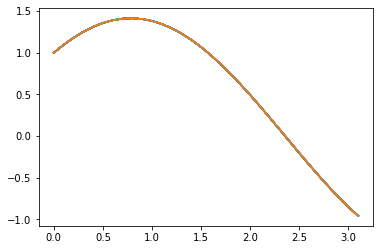

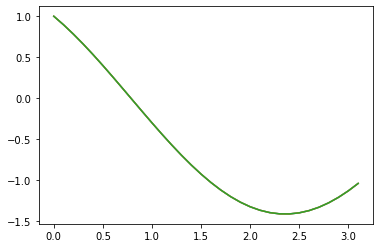

In [68]:
T1 = np.arange(0,math.pi,0.1)
for i in range(h_theta().T.shape[0]):
    plt.plot(T1,h_theta()[0])
plt.show()

for i in range(h_theta().T.shape[1]):
    plt.plot(T1,h_theta()[1])
plt.show()